#### **Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelBinarizer, LabelEncoder
from sklearn.metrics import silhouette_score, ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix, multilabel_confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, plot_roc_curve, f1_score

sns.set_theme(palette='viridis')
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('../data/mood_data.csv')
df.head()

,name,artist,track_id,instrumentalness,danceability,energy,liveness,loudness,acousticness,valence,speechiness,tempo,key,time_signature,length,popularity,mood
0,Kiss Me More (feat. SZA),Doja Cat,748mdHapucXQri7IAO8yFK,0.000158,0.762,0.701,0.1230,-3.541,0.23500,0.742,0.0286,110.968,8,4,208866,92,Happy
1,seaside_demo,SEB,73M0rMVx5CWE8M4uATSsto,0.000133,0.706,0.824,0.1110,-7.959,0.35500,0.860,0.0694,94.980,0,4,132000,54,Happy
2,Shivers,Ed Sheeran,6bQfNiqyCX7UaQSvVVGo4I,0.000000,0.788,0.859,0.0424,-2.724,0.28100,0.822,0.0856,141.020,2,4,207853,78,Happy
3,Heat Waves,Glass Animals,02MWAaffLxlfxAUY7c5dvx,0.000007,0.761,0.525,0.0921,-6.900,0.44000,0.531,0.0944,80.870,11,4,238805,85,Happy
4,Electric Love,BØRNS,2GiJYvgVaD2HtM8GqD9EgQ,0.001370,0.611,0.797,0.2600,-7.627,0.00543,0.518,0.0533,120.041,6,4,218106,82,Happy


In [3]:
df.shape

(5849, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5849 entries, 0 to 5848
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5849 non-null   object 
 1   artist            5849 non-null   object 
 2   track_id          5849 non-null   object 
 3   instrumentalness  5849 non-null   float64
 4   danceability      5849 non-null   float64
 5   energy            5849 non-null   float64
 6   liveness          5849 non-null   float64
 7   loudness          5849 non-null   float64
 8   acousticness      5849 non-null   float64
 9   valence           5849 non-null   float64
 10  speechiness       5849 non-null   float64
 11  tempo             5849 non-null   float64
 12  key               5849 non-null   int64  
 13  time_signature    5849 non-null   int64  
 14  length            5849 non-null   int64  
 15  popularity        5849 non-null   int64  
 16  mood              5849 non-null   object 


In [5]:
mood_mean=df.groupby('mood').mean()
mood_mean

,instrumentalness,danceability,energy,liveness,loudness,acousticness,valence,speechiness,tempo,key,time_signature,length,popularity
mood,,,,,,,,,,,,,
Calm,0.377390,0.566250,0.418113,0.147219,-12.828551,0.533209,0.397077,0.063728,114.031637,5.256039,3.885266,199049.187802,46.401570
Energetic,0.019837,0.665531,0.741194,0.205080,-5.641584,0.110434,0.556976,0.121004,123.177736,5.177486,3.984807,204661.474448,58.143646
Happy,0.049415,0.652748,0.705359,0.185085,-6.737772,0.180482,0.610693,0.069277,120.820803,5.135258,3.977204,210870.745441,53.467325
Sad,0.094819,0.544282,0.419955,0.148996,-9.785288,0.542850,0.324774,0.058517,118.574442,5.128062,3.847446,221027.595521,48.449265


In [7]:
features = df[['instrumentalness', 
             'danceability',
             'energy', 
             'liveness', 
             'loudness', 
             'acousticness', 
             'valence',
             'speechiness']]

In [8]:
df['mood_map'] = df['mood'].map({'Sad' : 0, 'Calm': 1, 'Happy': 2, 'Energetic':3})

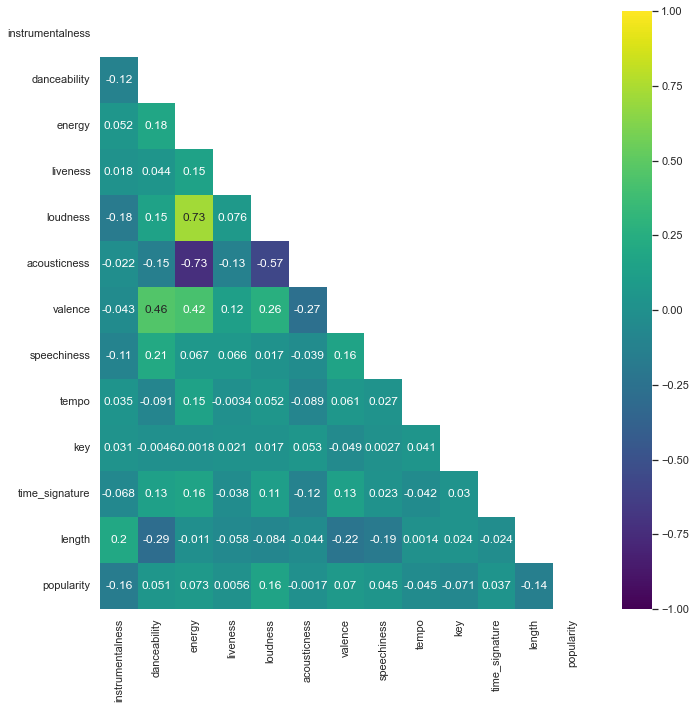

In [9]:
mask = np.zeros_like(df[df['mood']=='Sad'].drop(columns='mood_map').corr()) 
mask[np.triu_indices_from(mask)] = True
# heat map
fig, ax = plt.subplots(figsize=(11, 11))
plt.fontsize = 27
sns.heatmap(df[df['mood']=='Sad'].drop(columns='mood_map').corr(), mask= mask,
            annot = True, cmap='viridis', vmin = -1, vmax = 1);

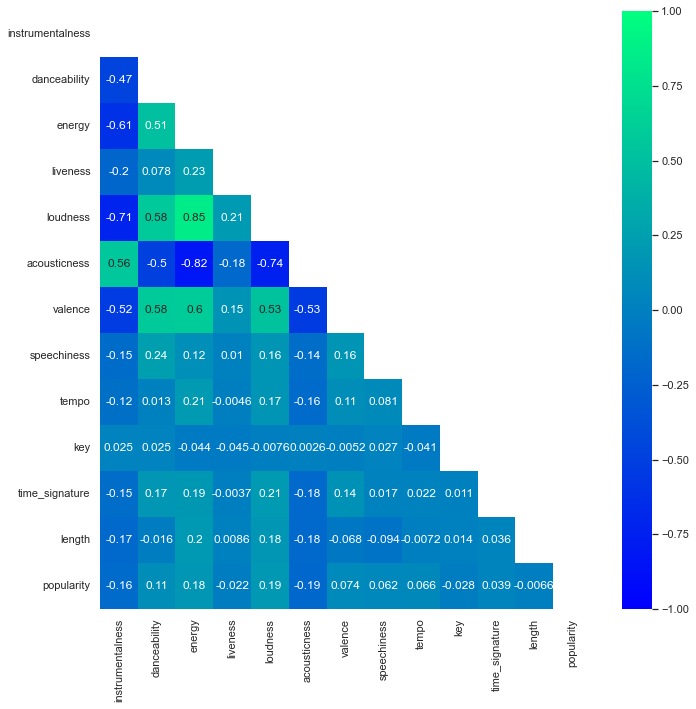

In [10]:
mask = np.zeros_like(df[df['mood']=='Calm'].drop(columns='mood_map').corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(11, 11))
plt.fontsize = 27
sns.heatmap(df[df['mood']=='Calm'].drop(columns='mood_map').corr(),  mask=mask,
            annot = True, cmap='winter', vmin = -1, vmax = 1);

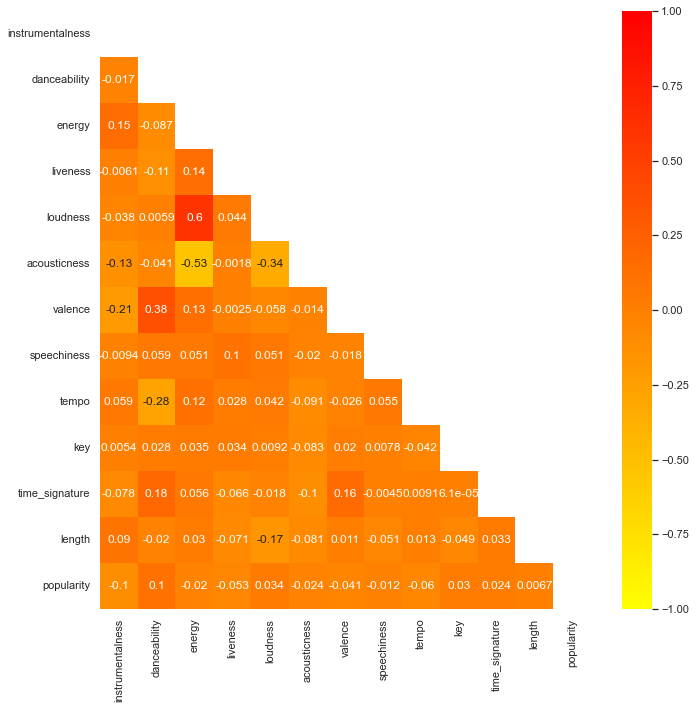

In [11]:
# Set up mask to be "True" in the upper triangle

mask = np.zeros_like(df[df['mood']=='Happy'].drop(columns='mood_map').corr())
mask[np.triu_indices_from(mask)] = True
# Heat map
fig, ax = plt.subplots(figsize=(11,11))
plt.fontsize = 27
sns.heatmap(df[df['mood']=='Happy'].drop(columns='mood_map').corr(),  mask=mask,
            annot = True, cmap='autumn_r', vmin = -1, vmax = 1);

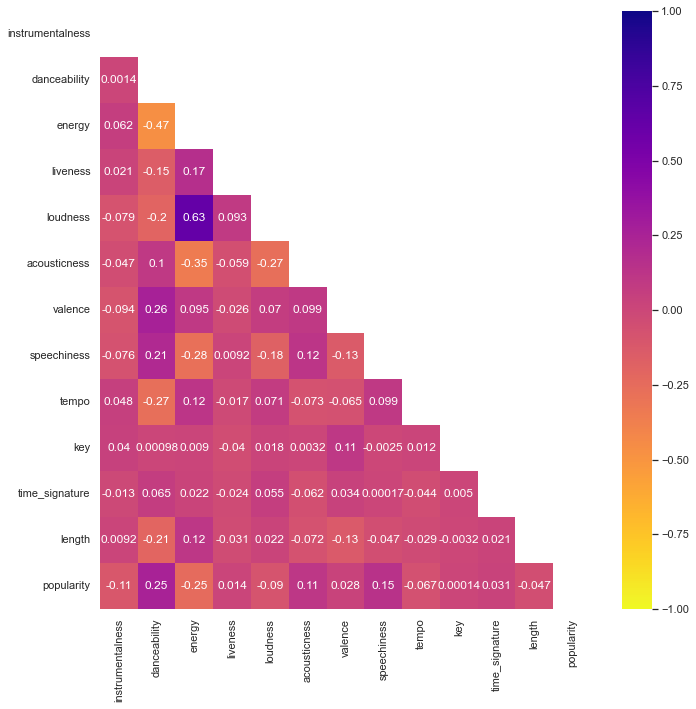

In [12]:
# Set up mask to be "True" in the upper triangle
mask = np.zeros_like(df[df['mood']=='Energetic'].drop(columns='mood_map').corr())
mask[np.triu_indices_from(mask)] = True

# Heat map
fig, ax = plt.subplots(figsize=(11, 11))
plt.fontsize = 27
sns.heatmap(df[df['mood']=='Energetic'].drop(columns='mood_map').corr(), mask=mask,
            annot = True, cmap='plasma_r', vmin = -1, vmax = 1);

In [13]:
X = features
# standardize X data
xc =  MinMaxScaler()
X_xc= xc.fit_transform(X)

scores = []
for k in range(2,31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_xc)
    inertia = cl.inertia_
    sil = silhouette_score(X_xc, cl.labels_)
    scores.append([k, inertia, sil])
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']
score_df.head(10)

,k,inertia,silhouette
0,2,1477.329927,0.408663
1,3,1107.383303,0.376431
2,4,929.339602,0.289548
3,5,803.364973,0.297058
4,6,730.388647,0.277127
5,7,682.812767,0.265274
6,8,644.977679,0.254190
7,9,611.430072,0.245635
8,10,579.542334,0.239223
9,11,555.588567,0.217234


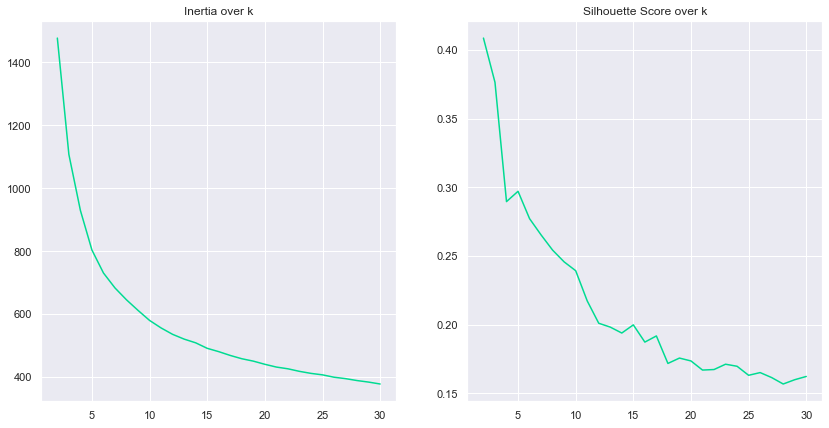

In [14]:
sns.set_theme(style='darkgrid', palette='winter_r')
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k');

In [15]:
km = KMeans(n_clusters=2)
km.fit(X_xc)
# Scaled X gives best results
df['cluster'] = km.labels_

In [16]:
# Check the mood by cluster
df.groupby('cluster')['mood'].value_counts()

cluster  mood     
0        Energetic    1430
         Happy        1246
         Calm          774
         Sad           579
1        Calm          882
         Sad           850
         Happy          70
         Energetic      18
Name: mood, dtype: int64

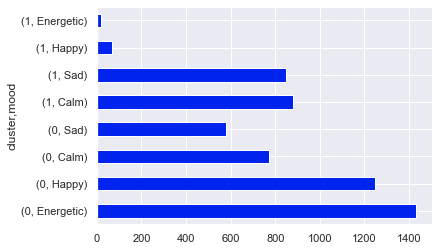

In [17]:
sns.set_theme(style='darkgrid', palette='winter')
df.groupby('cluster')['mood'].value_counts().plot(kind='barh');

#### **Cluster on Unlabeled data**

In [18]:
df_million=pd.read_csv('../data/01_features_small.csv')

In [21]:
features_million = df_million[['instrumentalness', 
                     'danceability',
                     'energy', 
                     'liveness', 
                     'loudness', 
                     'acousticness', 
                     'valence',
                     'speechiness']]
X_million = features_million
# standardize X data
xc = MinMaxScaler()
X_xc= xc.fit_transform(X_million)

In [22]:
%%time
scores = []
for k in range(2,31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_xc)
    inertia = cl.inertia_
    sil = silhouette_score(X_xc, cl.labels_)
    scores.append([k, inertia, sil])
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']
score_df.head(10)

Wall time: 21min 58s


,k,inertia,silhouette
0,2,17331.246639,0.335166
1,3,13978.758664,0.306754
2,4,11054.414870,0.333742
3,5,9934.069345,0.266708
4,6,9159.974725,0.251772
5,7,8529.662182,0.259048
6,8,7981.020315,0.253618
7,9,7557.624947,0.244754
8,10,7060.000076,0.255468
9,11,6641.149936,0.249236


In [23]:
km = KMeans(n_clusters=2)
km.fit(X_xc)
# Scaled X gives best results
df_million['cluster'] = km.labels_

In [24]:
df_million.to_csv('../data/df_clusters_partmillion.csv', index=False)

In [ ]:
df.to_csv('../data/df_clusters.csv', index=False)